## Implementing Polynomial Regression

In [180]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [181]:
## Creating Polynomial Dataset
X=6*np.random.rand(100, 1)-3
y=0.5* X**2 + 1.5*X +2 + np.random.randn(100, 1)

Text(0, 0.5, 'Y dataset')

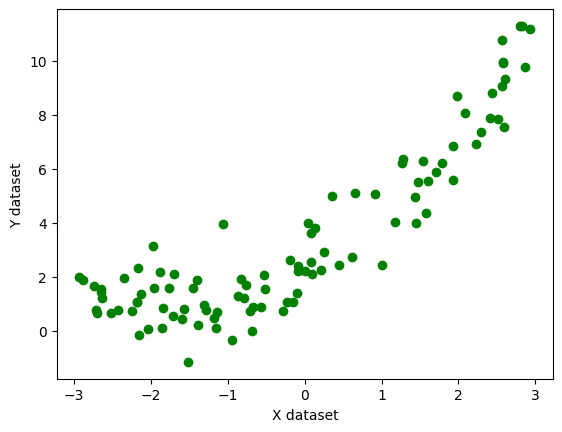

In [182]:
plt.scatter(X, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
## Let's implement Simple Linear Regression

from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [185]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [186]:
from sklearn.metrics import r2_score

y_pred = regression_1.predict(X_test)
score=r2_score(y_test, y_pred)

print(score) ## Less accuracy

0.7967470184637554


Text(0, 0.5, 'Y dataset')

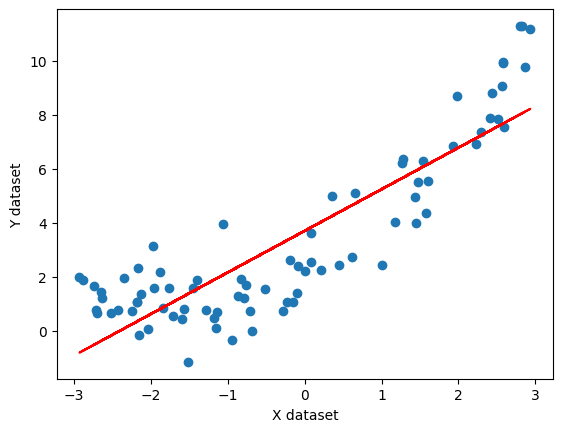

In [187]:
## Let's visualize this model

plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [188]:
## Let's apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

In [189]:
poly=PolynomialFeatures(degree=2, include_bias=True)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [190]:
X_train_poly

array([[ 1.00000000e+00, -2.16715722e+00,  4.69657040e+00],
       [ 1.00000000e+00, -1.60154163e+00,  2.56493559e+00],
       [ 1.00000000e+00, -1.96022272e+00,  3.84247311e+00],
       [ 1.00000000e+00,  8.68532061e-02,  7.54347941e-03],
       [ 1.00000000e+00, -2.63331956e+00,  6.93437188e+00],
       [ 1.00000000e+00, -7.92336328e-01,  6.27796856e-01],
       [ 1.00000000e+00, -8.69768270e-01,  7.56496844e-01],
       [ 1.00000000e+00,  2.51167843e+00,  6.30852855e+00],
       [ 1.00000000e+00, -2.34473266e+00,  5.49777125e+00],
       [ 1.00000000e+00, -1.56780508e+00,  2.45801276e+00],
       [ 1.00000000e+00, -2.71157121e+00,  7.35261843e+00],
       [ 1.00000000e+00, -2.42691736e+00,  5.88992786e+00],
       [ 1.00000000e+00, -2.34636486e-01,  5.50542806e-02],
       [ 1.00000000e+00,  1.47314972e+00,  2.17017009e+00],
       [ 1.00000000e+00, -6.87448296e-01,  4.72585160e-01],
       [ 1.00000000e+00, -2.65170083e+00,  7.03151727e+00],
       [ 1.00000000e+00,  1.28424155e+00

In [191]:
X_test_poly

array([[ 1.00000000e+00, -1.39343258e+00,  1.94165436e+00],
       [ 1.00000000e+00,  2.08778055e+00,  4.35882764e+00],
       [ 1.00000000e+00,  9.04091815e-02,  8.17382010e-03],
       [ 1.00000000e+00, -5.23793434e-01,  2.74359562e-01],
       [ 1.00000000e+00,  4.25357251e-02,  1.80928791e-03],
       [ 1.00000000e+00,  1.93155780e+00,  3.73091555e+00],
       [ 1.00000000e+00,  1.71147364e+00,  2.92914202e+00],
       [ 1.00000000e+00, -1.85564988e+00,  3.44343647e+00],
       [ 1.00000000e+00,  1.37089204e-01,  1.87934498e-02],
       [ 1.00000000e+00,  2.56335502e+00,  6.57078896e+00],
       [ 1.00000000e+00,  9.09217566e-01,  8.26676581e-01],
       [ 1.00000000e+00, -2.64594740e+00,  7.00103765e+00],
       [ 1.00000000e+00,  1.79172416e+00,  3.21027548e+00],
       [ 1.00000000e+00, -5.68120073e-01,  3.22760417e-01],
       [ 1.00000000e+00, -1.30959486e+00,  1.71503871e+00],
       [ 1.00000000e+00,  2.52864648e-01,  6.39405301e-02],
       [ 1.00000000e+00, -6.69903185e-01

In [192]:
from sklearn.metrics import r2_score
regression=LinearRegression()

regression.fit(X_train_poly, y_train)
y_pred=regression.predict(X_test_poly)

score=r2_score(y_test, y_pred)
print(score)

0.9168723684857252


In [193]:
regression.coef_

array([[0.        , 1.52443542, 0.46770469]])

In [194]:
regression.intercept_

array([2.15979268])

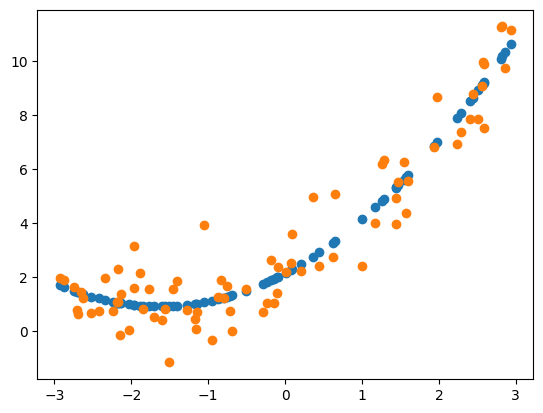

In [197]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [198]:
from sklearn.pipeline import Pipeline

In [199]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

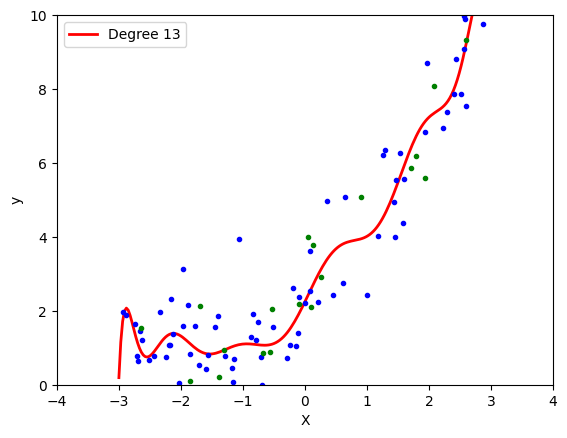

In [203]:
poly_regression(13)